In [4]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Pandas Profiling
### This is a very useful tool that can be used by analysts. It generates an analysis report on the data frame, and helps you better understand the correlation between variables.

In [4]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [6]:
dist = df['Outcome'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabetes Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

## Correlation Matrix with Plotly
### Correlation matrix: It helps us gain a better understanding of the correlation between the variables in the dataset.

In [7]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
import plotly.graph_objects as go
dfNew = df.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.show()

In [8]:
fig = px.scatter(df, x='Glucose', y='Insulin')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Glucose and Insulin')
fig.show()

In [9]:
fig = px.box(df, x='Outcome', y='Age')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Age and Outcome')
fig.show()

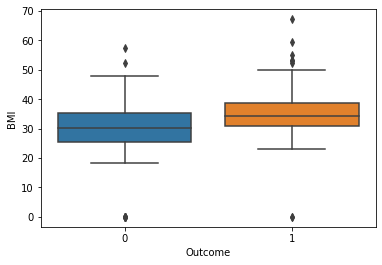

In [10]:
plot = sns.boxplot(x='Outcome',y="BMI",data=df)

### From the box plot above, we can see that higher BMI correlates with a positive outcome. People with diabetes tend to have higher BMI’s than people without diabetes.

## Data Storytelling

### Finally, we can tell a story around the data we have analyzed and visualized.

### People with diabetes are highly likely to be older than people who don’t. They are also more likely to have higher BMI’s, or suffer from obesity. They are also more likely to have higher glucose levels in their blood. People with higher glucose levels also tend to take more insulin.